# 6. Sorting and Searching

Sorting and Searching

- 6.1. Objectives
- 6.2. Searching
- 6.3. The Sequential Search
    - 6.3.1. Analysis of Sequential Search
- 6.4. The Binary Search
    - 6.4.1. Analysis of Binary Search
- 6.5. Hashing
    - 6.5.1. Hash Functions
    - 6.5.2. Collision Resolution
    - 6.5.3. Implementing the Map Abstract Data Type
    - 6.5.4. Analysis of Hashing
- 6.6. Sorting
- 6.7. The Bubble Sort
- 6.8. The Selection Sort
- 6.9. The Insertion Sort
- 6.10. The Shell Sort
- 6.11. The Merge Sort
- 6.12. The Quick Sort
- 6.13. Summary
- 6.14. Key Terms
- 6.15. Discussion Questions
- 6.16. Programming Exercises

# 6.1. Objectives

- To be able to explain and implement sequential search and binary search.
- To be able to explain and implement selection sort, bubble sort, merge sort, quick sort, insertion sort, and Shell sort.
- To understand the idea of hashing as a search technique.
- To introduce the map abstract data type.
- To implement the map abstract data type using hashing.

# 6.3. The Sequential Search

When data items are stored in a collection such as a list, we say that they have a linear or sequential relationship. Each data item is stored in a position relative to the others. In Python lists, these relative positions are the index values of the individual items. Since these index values are ordered, it is possible for us to visit them in sequence. This process gives rise to our first searching technique, the sequential search.

Figure 1 shows how this search works. Starting at the first item in the list, we simply move from item to item, following the underlying sequential ordering until we either find what we are looking for or run out of items. If we run out of items, we have discovered that the item we were searching for was not present.

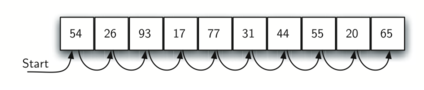

Figure 1: Sequential Search of a List of Integers

The Python implementation for this algorithm is shown in CodeLens 1. The function needs the list and the item we are looking for and returns a boolean value as to whether it is present.

In [4]:
def sequential_search(a_list, item):
    pos = 0

    while pos < len(a_list):
        if a_list[pos] == item:
            return True
        else:
            pos = pos + 1

    return False

In [5]:
sequential_search([1, 2, 32, 8, 17, 19, 42, 13, 0], 17)

True

In [6]:
def order_sequential_search(a_list, item):
    pos = 0

    while pos < len(a_list):
        if a_list[pos] == item:
            return True
        else:
            if a_list[pos] > item:
                return False
            else:
                pos = pos + 1

    return False

In [8]:
sequential_search([0, 1, 2, 8, 13, 17, 19, 32, 42], 19)

True

# 6.4. The Binary Search

It is possible to take greater advantage of the ordered list if we are clever with our comparisons. In the sequential search, when we compare against the first item, there are at most n−1 more items to look through if the first item is not what we are looking for. Instead of searching the list in sequence, a binary search will start by examining the middle item. If that item is the one we are searching for, we are done. If it is not the correct item, we can use the ordered nature of the list to eliminate half of the remaining items. If the item we are searching for is greater than the middle item, we know that the entire lower half of the list as well as the middle item can be eliminated from further consideration. The item, if it is in the list, must be in the upper half.

We can then repeat the process with the upper half. Start at the middle item and compare it against what we are looking for. Again, we either find it or split the list in half, therefore eliminating another large part of our possible search space. Figure 3 shows how this algorithm can quickly find the value 54. The complete function is shown in CodeLens 3.

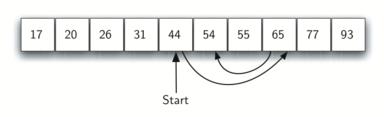

Figure 3: Binary Search of an Ordered List of Integers

In [9]:
def binary_search(a_list, item):
    first = 0
    last = len(a_list) - 1

    while first <= last:
        midpoint = (first + last) // 2
        if a_list[midpoint] == item:
            return True
        elif item < a_list[midpoint]:
            last = midpoint - 1
        else:
            first = midpoint + 1

    return False

In [13]:
binary_search([0, 1, 2, 8, 13, 17, 19, 32, 42],13)

True

In [ ]:
## Versión recursiva

def binary_search_rec(a_list, item):
    if len(a_list) == 0:
        return False
    else:
        midpoint = len(a_list) // 2
        if a_list[midpoint] == item:
            return True
        elif item < a_list[midpoint]:
            return binary_search_rec(a_list[:midpoint], item)
        else:
            return binary_search_rec(a_list[midpoint + 1 :], item)

# 6.4.1. Analysis of Binary Search

To analyze the binary search algorithm, we need to recall that each comparison eliminates about half of the remaining items from consideration. What is the maximum number of comparisons this algorithm will require to check the entire list? If we start with n items, about $\frac{n}{2}$ items will be left after the first comparison. After the second comparison, there will be about $\frac{n}{4}$. Then $\frac{n}{8}$, $\frac{n}{16}$, and so on. How many times can we split the list? Table 3 helps us to see the answer.

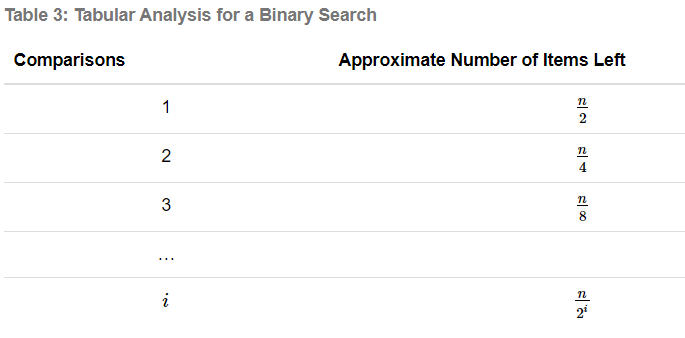

When we split the list enough times, we end up with a list that has just one item. Either that is the item we are looking for or it is not. Either way, we are done. The number of comparisons necessary to get to this point is i where $\frac {n}{2^i} =1$. Solving for i gives us i=logn. The maximum number of comparisons is logarithmic with respect to the number of items in the list. Therefore, the binary search is O(logn).

One additional analysis issue needs to be addressed. In the recursive solution shown above, the recursive call,

binary_search_rec(a_list[:midpoint], item)

uses the slice operator to create the left half of the list that is then passed to the next invocation (similarly for the right half as well). The analysis that we did above assumed that the slice operator takes constant time. However, we know that the slice operator in Python is actually O(k). This means that the binary search using slice will not perform in strict logarithmic time. Luckily this can be remedied by passing the list along with the starting and ending indices. The indices can be calculated as we did in Listing 3. We leave this implementation as an exercise.

Even though a binary search is generally better than a sequential search, it is important to note that for small values of n, the additional cost of sorting is probably not worth it. In fact, we should always consider whether it is cost effective to take on the extra work of sorting to gain searching benefits. If we can sort once and then search many times, the cost of the sort is not so significant. However, for large lists, sorting even once can be so expensive that simply performing a sequential search from the start may be the best choice.

In [17]:
sum([3,4])

7

In [20]:
sum([ord(c) for c in 'cat'])

312

In [21]:
[ord(c) for c in 'cat']

[99, 97, 116]

In [23]:
### Hash table queda pendiente porque es un chingo

# 6.6. Sorting

Sorting is the process of placing elements from a collection in some kind of order. For example, a list of words could be sorted alphabetically or by length. A list of cities could be sorted by population, by area, or by zip code. We have already seen a number of algorithms that were able to benefit from having a sorted list (recall the final anagram example and the binary search).

There are many, many sorting algorithms that have been developed and analyzed. This suggests that sorting is an important area of study in computer science. Sorting a large number of items can take a substantial amount of computing resources. Like searching, the efficiency of a sorting algorithm is related to the number of items being processed. For small collections, a complex sorting method may be more trouble than it is worth. The overhead may be too high. On the other hand, for larger collections, we want to take advantage of as many improvements as possible. In this section we will discuss several sorting techniques and compare them with respect to their running time.

Before getting into specific algorithms, we should think about the operations that can be used to analyze a sorting process. First, it will be necessary to compare two values to see which is smaller (or larger). In order to sort a collection, it will be necessary to have some systematic way to compare values to see if they are out of order. The total number of comparisons will be the most common way to measure a sort procedure. Second, when values are not in the correct position with respect to one another, it may be necessary to exchange them. This exchange is a costly operation and the total number of exchanges will also be important for evaluating the overall efficiency of the algorithm.

# 6.7. The Bubble Sort

The bubble sort makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place. In essence, each item “bubbles” up to the location where it belongs.

Figure 1 shows the first pass of a bubble sort. The shaded items are being compared to see if they are out of order. If there are n items in the list, then there are n−1 pairs of items that need to be compared on the first pass. It is important to note that once the largest value in the list is part of a pair, it will continually be moved along until the pass is complete.

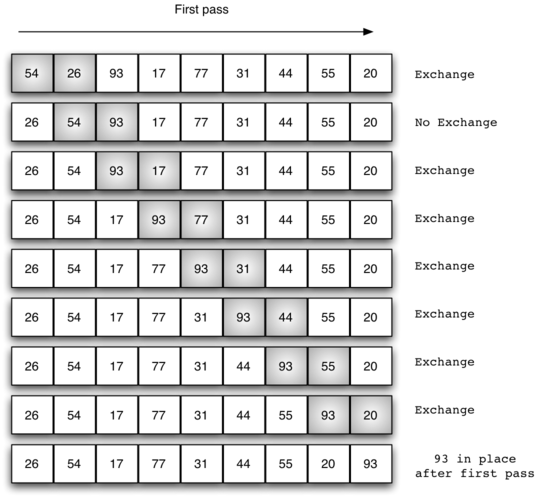

At the start of the second pass, the largest value is now in place. There are n−1 items left to sort, meaning that there will be n−2 pairs. Since each pass places the next largest value in place, the total number of passes necessary will be n−1. After completing the n−1 passes, the smallest item must be in the correct position with no further processing required. ActiveCode 1 shows the complete bubble_sort function. It takes the list as a parameter, and modifies it by exchanging items as necessary.

The exchange operation, sometimes called a “swap,” is slightly different in Python than in most other programming languages. Typically, swapping two elements in a list requires a temporary storage location (an additional memory location). A code fragment such as

In [26]:
# temp = a_list[i]
# a_list[i] = a_list[j]
# a_list[j] = temp

will exchange the i-th and j-th items in the list. Without the temporary storage, one of the values would be overwritten.

In Python, it is possible to perform simultaneous assignment. The statement a, b = b, a will result in two assignment statements being done at the same time (see Figure 2). Using simultaneous assignment, the exchange operation can be done in one statement.

Lines 5-7 in ActiveCode 1 perform the exchange of the i and (i+1)-th items using the three–step procedure described earlier. Note that we could also have used the simultaneous assignment to swap the items.

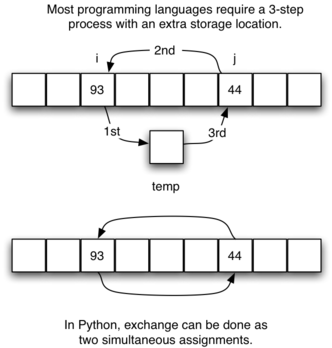

In [1]:
def bubble_sort(a_list):
    for i in range(len(a_list) - 1, 0, -1):
        for j in range(i):
            if a_list[j] > a_list[j + 1]:
                temp = a_list[j]
                a_list[j] = a_list[j + 1]
                a_list[j + 1] = temp



In [17]:
a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubble_sort(a_list)
print(a_list)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [19]:
a_list

[17, 20, 26, 31, 44, 54, 55, 77, 93]

To analyze the bubble sort, we should note that regardless of how the items are arranged in the initial list, n−1 passes will be made to sort a list of size n. Table 1 shows the number of comparisons for each pass. The total number of comparisons is the sum of the first n−1 integers. Recall that the sum of the first n integers is $\frac{1}{2}n^{2} + \frac{1}{2}n$. The sum of the first n−1 integers is $\frac{1}{2}n^{2} + \frac{1}{2}n - n$, which is $\frac{1}{2}n^{2} - \frac{1}{2}n$. This is still $O(n^{2})$ comparisons. In the best case, if the list is already ordered, no exchanges will be made. However, in the worst case, every comparison will cause an exchange. On average, we exchange half of the time.

Table 1: Comparisons for Each Pass of Bubble Sort

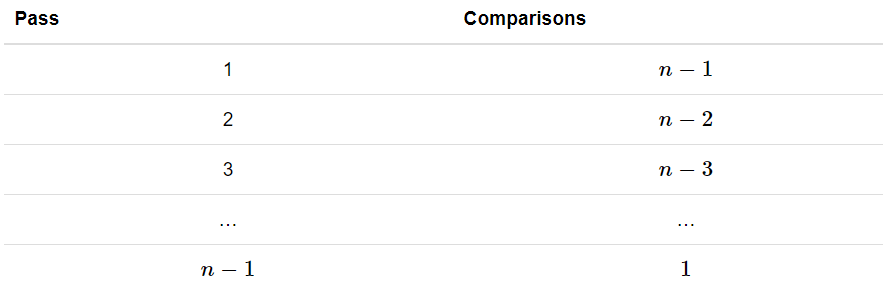

A bubble sort is often considered the most inefficient sorting method since it must exchange items before the final location is known. These “wasted” exchange operations are very costly. However, because the bubble sort makes passes through the entire unsorted portion of the list, it has the capability to do something most sorting algorithms cannot. In particular, if during a pass there are no exchanges, then we know that the list must be sorted. A bubble sort can be modified to stop early if it finds that the list has become sorted. This means that for lists that require just a few passes, a bubble sort may have an advantage in that it will recognize the sorted list and stop. ActiveCode 2 shows this modification, which is often referred to as the short bubble.

In [39]:
def bubble_sort_short(a_list):
    for i in range(len(a_list) - 1, 0, -1):
        exchanges = False
        for j in range(i):
            if a_list[j] > a_list[j + 1]:
                exchanges = True
                a_list[j], a_list[j + 1] = a_list[j + 1], a_list[j]
        if not exchanges:
            break


a_list = [20, 30, 40, 90, 50, 60, 70, 80, 100, 110]
bubble_sort_short(a_list)
print(a_list)

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


# 6.8. The Selection Sort

The selection sort improves on the bubble sort by making only one exchange for every pass through the list. In order to do this, a selection sort looks for the largest value as it makes a pass and, after completing the pass, places it in the proper location. As with a bubble sort, after the first pass, the largest item is in the correct place. After the second pass, the next largest is in place. This process continues and requires n−1 passes to sort n items, since the final item must be in place after the (n−1) st pass.

Figure 3 shows the entire sorting process. On each pass, the largest remaining item is selected and then placed in its proper location. The first pass places 93, the second pass places 77, the third places 55, and so on. The function is shown in ActiveCode 1.

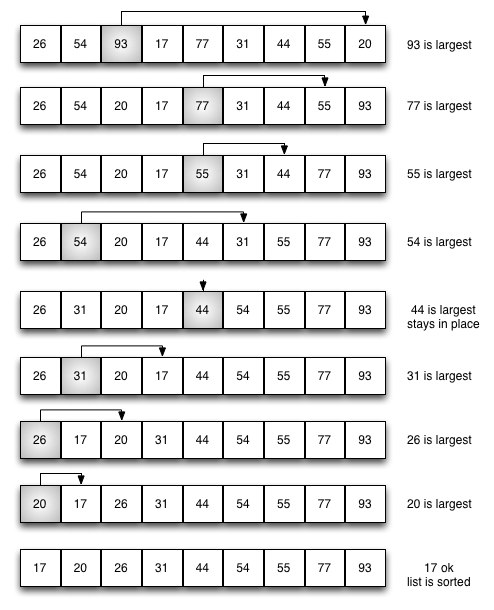

In [53]:
def selection_sort(a_list):
    for i, item in enumerate(a_list):
        min_idx = len(a_list) - 1
        for j in range(i, len(a_list)):
            if a_list[j] < a_list[min_idx]:
                min_idx = j
        if min_idx != i:
            a_list[min_idx], a_list[i] = a_list[i], a_list[min_idx]


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
selection_sort(a_list)
print(a_list)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


You may see that the selection sort makes the same number of comparisons as the bubble sort and is therefore also $O(n^{2})$. However, due to the reduction in the number of exchanges, the selection sort typically executes faster in benchmark studies. In fact, for our list, the bubble sort makes 20 exchanges, while the selection sort makes only 8.

# 6.9. The Insertion Sort

The insertion sort, although still $O(n^{2})$, works in a slightly different way. It always maintains a sorted sublist in the lower positions of the list. Each new item is then “inserted” back into the previous sublist such that the sorted sublist is one item larger. Figure 4 shows the insertion sorting process. The shaded items represent the ordered sublists as the algorithm makes each pass.

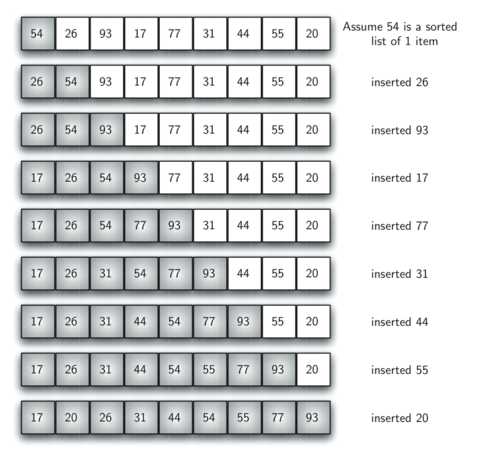

We begin by assuming that a list with one item (position 0) is already sorted. On each pass, one for each item 1 through n−1, the current item is checked against those in the already sorted sublist. As we look back into the already sorted sublist, we shift those items that are greater to the right. When we reach a smaller item or the end of the sublist, the current item can be inserted.

Figure 5 shows the fifth pass in detail. At this point in the algorithm, a sorted sublist of five items consisting of 17, 26, 54, 77, and 93 exists. We want to insert 31 back into the already sorted items. The first comparison against 93 causes 93 to be shifted to the right. 77 and 54 are also shifted. When the item 26 is encountered, the shifting process stops and 31 is placed in the open position. Now we have a sorted sublist of six items.

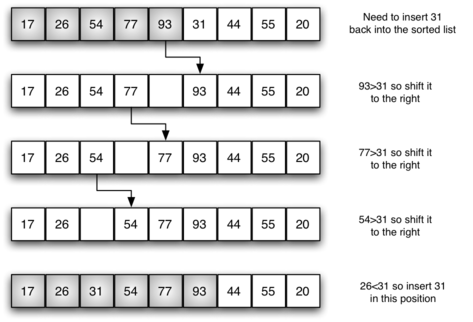

The implementation of insertion_sort (ActiveCode 1) shows that there are again n−1 passes to sort n items. The iteration starts at position 1 and moves through position n−1, as these are the items that need to be inserted back into the sorted sublists. Line 8 performs the shift operation that moves a value up one position in the list, making room behind it for the insertion. Remember that this is not a complete exchange as was performed in the previous algorithms.

The maximum number of comparisons for an insertion sort is the sum of the first n−1 integers. Again, this is $O(n^{2})$. However, in the best case, only one comparison needs to be done on each pass. This would be the case for an already sorted list.

One note about shifting versus exchanging is also important. In general, a shift operation requires approximately a third of the processing work of an exchange since only one assignment is performed. In benchmark studies, insertion sort will show very good performance.

In [5]:
def insertion_sort(a_list):
    for i in range(1, len(a_list)):
        cur_val = a_list[i]
        cur_pos = i

        while cur_pos > 0 and a_list[cur_pos - 1] > cur_val:
            a_list[cur_pos] = a_list[cur_pos - 1]
            cur_pos = cur_pos - 1
        a_list[cur_pos] = cur_val

In [9]:
a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insertion_sort(a_list)
print(a_list)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


# 6.10. The Shell Sort

The Shell sort, sometimes called the “diminishing increment sort,” improves on the insertion sort by breaking the original list into a number of smaller sublists, each of which is sorted using an insertion sort. The unique way that these sublists are chosen is the key to the shell sort. Instead of breaking the list into sublists of contiguous items, the shell sort uses an increment i, sometimes called the gap, to create a sublist by choosing all items that are i items apart.

This can be seen in Figure 6. This list has nine items. If we use an increment of three, there are three sublists, each of which can be sorted by an insertion sort. After completing these sorts, we get the list shown in Figure 7. Although this list is not completely sorted, something very interesting has happened. By sorting the sublists, we have moved the items closer to where they actually belong

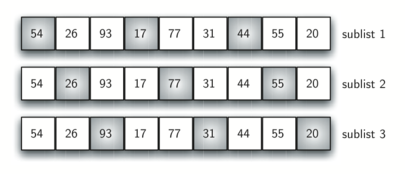
Figure 6: A Shell Sort with Increments of Three

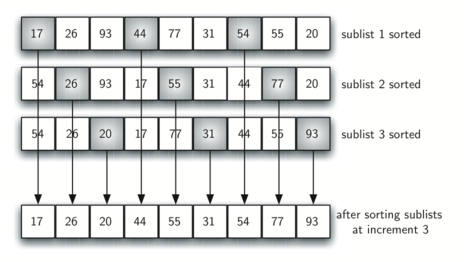
Figure 7: A Shell Sort after Sorting Each Sublist

Figure 8 shows a final insertion sort using an increment of one; in other words, a standard insertion sort. Note that by performing the earlier sublist sorts, we have now reduced the total number of shifting operations necessary to put the list in its final order. For this case, we need only four more shifts to complete the process.

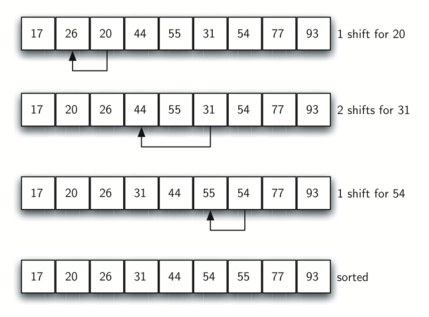

Figure 8: ShellSort: A Final Insertion Sort with Increment of 1

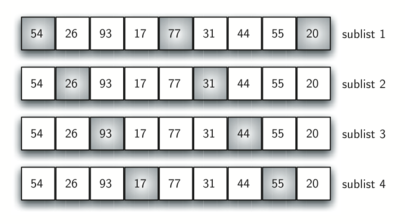

Figure 9: Initial Sublists for a Shell Sort

We said earlier that the way in which the increments are chosen is the unique feature of the shell sort. The function shown in ActiveCode 1 uses a different set of increments. In this case, we begin with $\frac {n}{2}$ sublists. On the next pass, $\frac {n}{4}$ sublists are sorted. Eventually, a single list is sorted with the basic insertion sort. Figure 9 shows the first sublists for our example using this increment.

The following invocation of the shell_sort function shows the partially sorted lists after each increment, with the final sort being an insertion sort with an increment of one.


In [13]:
def shell_sort(a_list):
    sublist_count = len(a_list) // 2
    while sublist_count > 0:
        for pos_start in range(sublist_count):
            gap_insertion_sort(a_list, pos_start, sublist_count)
        print("After increments of size", sublist_count, "the list is", a_list)
        sublist_count = sublist_count // 2


def gap_insertion_sort(a_list, start, gap):
    for i in range(start + gap, len(a_list), gap):
        cur_val = a_list[i]
        cur_pos = i
        while cur_pos >= gap and a_list[cur_pos - gap] > cur_val:
            a_list[cur_pos] = a_list[cur_pos - gap]
            cur_pos = cur_pos - gap
        a_list[cur_pos] = cur_val


In [15]:
a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
shell_sort(a_list)
print(a_list)

After increments of size 4 the list is [20, 26, 44, 17, 54, 31, 93, 55, 77]
After increments of size 2 the list is [20, 17, 44, 26, 54, 31, 77, 55, 93]
After increments of size 1 the list is [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


At first glance you may think that a Shell sort cannot be better than an insertion sort, since it does a complete insertion sort as the last step. It turns out, however, that this final insertion sort does not need to do very many comparisons (or shifts) since the list has been pre-sorted by earlier incremental insertion sorts, as described above. In other words, each pass produces a list that is “more sorted” than the previous one. This makes the final pass very efficient.

Although a general analysis of the shell sort is well beyond the scope of this text, we can say that it tends to fall somewhere between O(n) and $O(n^{2})$, based on the behavior described above. For the increments shown in Listing 5, the performance is $O(n^{2})$. By changing the increment, for example using $2^{k}-1$ (1, 3, 7, 15, 31, and so on), a shell sort can perform at $O(n^{\frac {3}{2}})$.

# 6.11. The Merge Sort

We now turn our attention to using a divide and conquer strategy as a way to improve the performance of sorting algorithms. The first algorithm we will study is the merge sort. Merge sort is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). If the list has more than one item, we split the list and recursively invoke a merge sort on both halves. Once the two halves are sorted, the fundamental operation, called a merge, is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single, sorted, new list. Figure 10 shows our familiar example list as it is being split by merge_sort. Figure 11 shows the simple lists, now sorted, as they are merged back together.

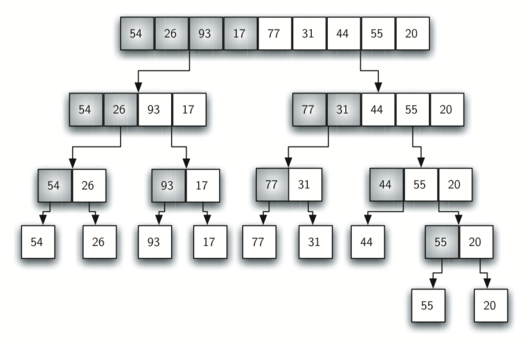

Figure 10: Splitting the List in a Merge Sort

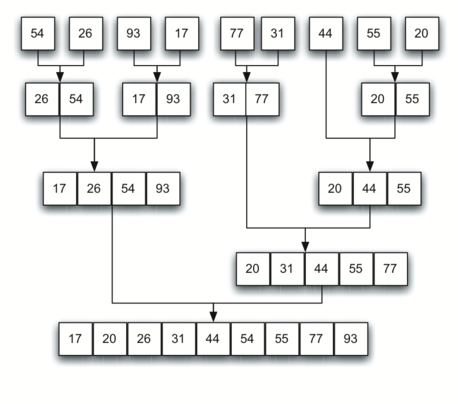

Figure 11: Lists as They Are Merged Together


The merge_sort function shown in ActiveCode 1 begins by asking the base case question. If the length of the list is less than or equal to one, then we already have a sorted list and no more processing is necessary. If, on the other hand, the length is greater than one, then we use the Python slice operation to extract the left and right halves. It is important to note that the list may not have an even number of items. That does not matter, as the lengths will differ by at most one.

In [17]:
def merge_sort(a_list):
    print("Splitting", a_list)
    if len(a_list) > 1:
        mid = len(a_list) // 2
        left_half = a_list[:mid]
        right_half = a_list[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i, j, k = 0, 0, 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] <= right_half[j]:
                a_list[k] = left_half[i]
                i = i + 1
            else:
                a_list[k] = right_half[j]
                j = j + 1
            k = k + 1

        while i < len(left_half):
            a_list[k] = left_half[i]
            i = i + 1
            k = k + 1

        while j < len(right_half):
            a_list[k] = right_half[j]
            j = j + 1
            k = k + 1
    print("Merging", a_list)


In [27]:
a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
merge_sort(a_list)
print(a_list)

Splitting [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting [54, 26, 93, 17]
Splitting [54, 26]
Splitting [54]
Merging [54]
Splitting [26]
Merging [26]
Merging [26, 54]
Splitting [93, 17]
Splitting [93]
Merging [93]
Splitting [17]
Merging [17]
Merging [17, 93]
Merging [17, 26, 54, 93]
Splitting [77, 31, 44, 55, 20]
Splitting [77, 31]
Splitting [77]
Merging [77]
Splitting [31]
Merging [31]
Merging [31, 77]
Splitting [44, 55, 20]
Splitting [44]
Merging [44]
Splitting [55, 20]
Splitting [55]
Merging [55]
Splitting [20]
Merging [20]
Merging [20, 55]
Merging [20, 44, 55]
Merging [20, 31, 44, 55, 77]
Merging [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


Once the merge_sort function is invoked on the left half and the right half (lines 8–9), it is assumed they are sorted. The rest of the function (lines 11–29) is responsible for merging the two smaller sorted lists into a larger sorted list. Notice that the merge operation places the items back into the original list (a_list) one at a time by repeatedly taking the smallest item from the sorted lists. Note that the statement in line 13 (left_half[i] <= right_half[j]) ensures that the algorithm is stable. A stable algorithm maintains the order of duplicate items in a list and is preferred in most cases.

The merge_sort function has been augmented with a print statement (line 2) to show the contents of the list being sorted at the start of each invocation. There is also a print statement (line 30) to show the merging process. The transcript shows the result of executing the function on our example list. Note that the list with 44, 55, and 20 will not divide evenly. The first split gives [44] and the second gives [55, 20]. It is easy to see how the splitting process eventually yields a list that can be immediately merged with other sorted lists.

In order to analyze the merge_sort function, we need to consider the two distinct processes that make up its implementation. First, the list is split into halves. We already computed (in a binary search) that we can divide a list in half logn times where n is the length of the list. The second process is the merge. Each item in the list will eventually be processed and placed on the sorted list. So the merge operation which results in a list of size n requires n operations. The result of this analysis is that logn splits, each of which costs n for a total of n logn operations. A merge sort is an O(n logn) algorithm.

Recall that the slicing operator is O(k) where k is the size of the slice. In order to guarantee that merge_sort will be O(n logn) we will need to remove the slice operator. Again, this is possible if we simply pass the starting and ending indices along with the list when we make the recursive call. We leave this as an exercise.

It is important to notice that the merge_sort function requires extra space to hold the two halves as they are extracted with the slicing operations. This additional space can be a critical factor if the list is large and can make this sort problematic when working on large data sets.

# 6.12. The Quick Sort

The quick sort uses divide and conquer to gain the same advantages as the merge sort, while not using additional storage. As a trade-off, however, it is possible that the list may not be divided in half. When this happens, we will see that performance is diminished.

A quick sort first selects a value, which is called the pivot value. Although there are many different ways to choose the pivot value, we will simply use the first item in the list. The role of the pivot value is to assist with splitting the list. The actual position where the pivot value belongs in the final sorted list, commonly called the split point, will be used to divide the list for subsequent calls to the quick sort.

Figure 12 shows that 54 will serve as our first pivot value. Since we have looked at this example a few times already, we know that 54 will eventually end up in the position currently holding 31. The partition process will happen next. It will find the split point and at the same time move other items to the appropriate side of the list, either less than or greater than the pivot value.

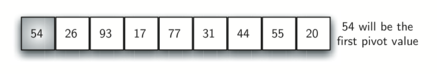

Figure 12: The First Pivot Value for a Quick Sort

Partitioning begins by locating two position markers—let’s call them left_mark and right_mark—at the beginning and end of the remaining items in the list (positions 1 and 8 in Figure 13). The goal of the partition process is to move items that are on the wrong side with respect to the pivot value while also converging on the split point. Figure 13 shows this process as we locate the position of 54.

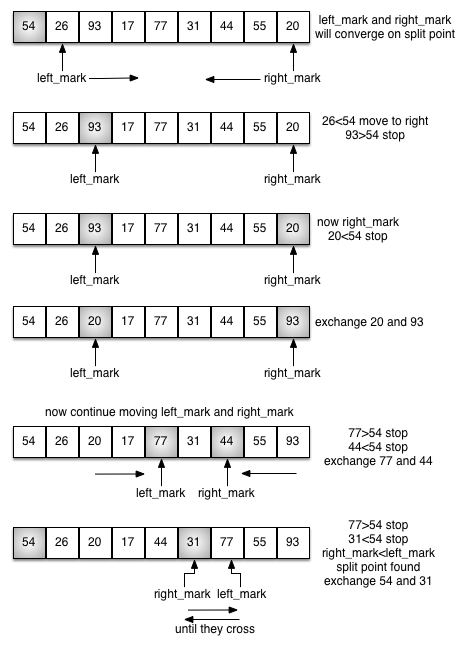

Figure 13: Finding the Split Point for 54

We begin by incrementing left_mark until we locate a value that is greater than the pivot value. We then decrement right_mark until we find a value that is less than the pivot value. At this point we have discovered two items that are out of place with respect to the eventual split point. For our example, this occurs at 93 and 20. Now we can exchange these two items and then repeat the process again.

At the point where right_mark becomes less than left_mark, we stop. The position of right_mark is now the split point. The pivot value can be exchanged with the contents of the split point and the pivot value is now in place (Figure 14). In addition, all the items to the left of the split point are less than the pivot value, and all the items to the right of the split point are greater than the pivot value. The list can now be divided at the split point and the quick sort can be invoked recursively on the two halves.

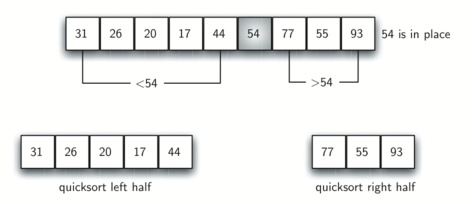

Figure 14: Completing the Partition Process to Find the Split Point for 54

The quick_sort function shown in ActiveCode 1 invokes a recursive function, quick_sort_helper. quick_sort_helper begins with the same base case as the merge sort. If the length of the list is less than or equal to one, it is already sorted. If it is greater, then it can be partitioned and recursively sorted. The partition function implements the process described earlier.

In [29]:
def quick_sort(a_list):
    quick_sort_helper(a_list, 0, len(a_list) - 1)


def quick_sort_helper(a_list, first, last):
    if first < last:
        split = partition(a_list, first, last)
        quick_sort_helper(a_list, first, split - 1)
        quick_sort_helper(a_list, split + 1, last)


def partition(a_list, first, last):
    pivot_val = a_list[first]
    left_mark = first + 1
    right_mark = last
    done = False

    while not done:
        while left_mark <= right_mark and a_list[left_mark] <= pivot_val:
            left_mark = left_mark + 1
        while left_mark <= right_mark and a_list[right_mark] >= pivot_val:
            right_mark = right_mark - 1
        if right_mark < left_mark:
            done = True
        else:
            a_list[left_mark], a_list[right_mark] = (
                a_list[right_mark],
                a_list[left_mark],
            )
    a_list[first], a_list[right_mark] = a_list[right_mark], a_list[first]

    return right_mark


a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
quick_sort(a_list)
print(a_list)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


To analyze the quick_sort function, note that for a list of length n, if the partition always occurs in the middle of the list, there will again be logn divisions. In order to find the split point, each of the n items needs to be checked against the pivot value. The result is nlogn. In addition, there is no need for additional memory as in the merge sort process.

Unfortunately, in the worst case, the split points may not be in the middle and can be very skewed to the left or the right, leaving a very uneven division. In this case, sorting a list of n items divides into sorting a list of 0 items and a list of n−1 items. Then sorting a list of n−1 divides into a list of size 0 and a list of size n−2, and so on. The result is an $O(n^{2})$ sort with all of the overhead that recursion requires.

We mentioned earlier that there are different ways to choose the pivot value. In particular, we can attempt to alleviate some of the potential for an uneven division by using a technique called median of three. To choose the pivot value, we will consider the first, the middle, and the last element in the list. In our example, those are 54, 77, and 20. Now pick the median value, in our case 54, and use it for the pivot value (of course, that was the pivot value we used originally). The idea is that in the case where the first item in the list does not belong toward the middle of the list, the median of three will choose a better “middle” value. This will be particularly useful when the original list is somewhat sorted to begin with. We leave the implementation of this pivot value selection as an exercise.

# 6.13. Summary

- A sequential search is O(n) for ordered and unordered lists.
- A binary search of an ordered list is O(logn) in the worst case.
- Hash tables can provide constant time searching.
- A bubble sort, a selection sort, and an insertion sort are O(n2) algorithms.
- A Shell sort improves on the insertion sort by sorting incremental sublists. It falls between O(n) and O(n2).
- A merge sort is O(nlogn), but requires additional space for the merging process.
- A quick sort is O(nlogn), but may degrade to O(n2) if the split points are not near the middle of the list. It does not require additional space.